# Big Mart Sales Prediction

**Porblem Statement:** The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

This project will proceed with the following structure:

1. **Hypothesis Generation** — attempt to better understand the problem by formulating pre-conceived hypothesis and possible factors relating to or affecting the outcome which are the sales

2. **Data Exploration** — exploratory data analysis on categorical and continuous variables and formulating inferences from them

3. **Data Cleaning** — impute missing data and vet for any outliers

4. **Feature Engineering** — one hot encode categorical features into new features with binary values for machine learning algorithm

5. **Model Building** — build predictive machine learning model 

## 1. Hypothesis Generation

A crucial and mostly underated process in the data analysis process whereby we attempt to better understand the problem by formulating pre-conceived hypothesis and possible factors relating to or affecting the outcome before even looking at the data.

Here are some examples:

### The Hypotheses

#### Store-Level 
1. Stores located in cities or urban areas may generate higher sales due to **density of population being high**
2. Cities and urban areas may have populations in the **higher income bracket**, thus contributing to higher sales
3. **Larger stores** should technically generate higher sales 
4. **Absence of other competitor stores** should allow for higher sales
4. **Effective marketing** should drive higher sales
5. **Good customer service** should yield higher sales 

#### Product-Level
1. Brands affect sales; **branded products** yield higher sales
2. **Effective product marketing, popular products** will increase sales especially through word of mouth
3. **Daily essentials products or products with high utility** will generate more sales
4. **Products on offer or sale** will yield higher sales due to hype and demand

## 2. Data Exploration

Exploratory data analysis will be conducted to obtain some inferences about the dataset and maybe also confirm some of our hypothesis from the previous section.

In [1]:
# Import libraries
import pandas as pd
import numpy as np

In [2]:
# Read files 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


We will combine both the train and test sets into one, perform feature engineering and dividing them up again later.

In [5]:
# Add labels to train and test sets
train['label'] = 'train'
test['label'] = 'test'
data = pd.concat([train, test], axis = 0, ignore_index = True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [6]:
# Check for null values
data.isnull().sum().sort_values(ascending = False)

Item_Outlet_Sales            5681
Outlet_Size                  4016
Item_Weight                  2439
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
label                           0
dtype: int64

The Item_Outlet_Sales columns is the target variable and the missing values are from the test set so we can conveniently ignore it. However, we have to impute the missing values in the Outlet_Size and Item_Weight columns. 

In [7]:
# Let's view some basic statistics for nunmerical variables
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Item_Visibility 
Funnily enough, the Item_Visibility has a minimum value of 0 which makes absolutely no sense. How can a store dedicate 0% of display area for all products? What would they be selling then?

#### Outlet_Establishment_Year
Knowing the numerical age of a store may prove to be more valuable than knowing the year of when a store was established. So we may consider converting the column into Outlet_Age instead.

In [8]:
# Let's take a look at unique items in categorical variables
data[data.columns[data.dtypes == 'object']].nunique().sort_values(ascending = False)

Item_Identifier         1559
Item_Type                 16
Outlet_Identifier         10
Item_Fat_Content           5
Outlet_Type                4
Outlet_Size                3
Outlet_Location_Type       3
label                      2
dtype: int64

Reiterating from the problem statement in the beginning of this project, we can see there are indeed **1559 unique items across 10 different stores**. Note that there are also **16 unique values in the Item_Type column**. Let's dive deeper into these categorical variables. 

In [9]:
# Filter for categorical columns
categorical_cols =  data.columns[data.dtypes == 'object'].to_list()

# Drop Item_Identifier, Outlet_Identifier and label columns as they provide no value in our EDA
categorical_cols = [col for col in categorical_cols if col not in ['Item_Identifier', 'Outlet_Identifier', 'label']]

# Frequency of categorical variables
for col in categorical_cols:
    print(col)
    print(data[col].value_counts())
    print('-'*100)

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
----------------------------------------------------------------------------------------------------
Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
----------------------------------------------------------------------------------------------------
Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
-------------------------------------------------------

#### Some Observations:

1. Low Fat values have inconsistent formatting taking different forms like 'Low Fat', 'LF' and 'low fat'
2. We can combine some of the lower count categories in the Item_Type column into a singular category called 'Others'

## 3. Data Cleaning

### Imputing Missing Values

From the distribution plot of the item weights shown below, I believe it is reasonable to impute the missing values with the average weight of the particular item. 

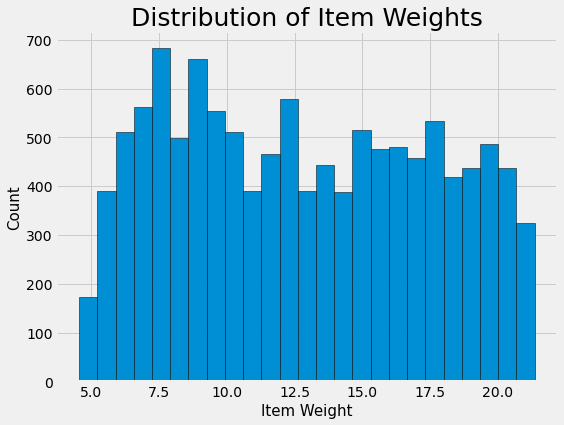

In [10]:
import matplotlib.pyplot as plt
# set style
plt.style.use('fivethirtyeight')

# Plot distribution of item weights
plt.figure(figsize = (8, 6))
plt.hist(data.Item_Weight, bins = 25, ec = 'black')
plt.title('Distribution of Item Weights', fontsize = 25)
plt.xlabel('Item Weight', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

In [11]:
# Create dataframe of unique product IDs as indexes and their respective weights as values
item_id_weights = data.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')
item_id_weights

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [12]:
# Impute the missing weight values in the data using the indentifier-indexed dataframe created above
data.loc[data['Item_Weight'].isnull(), 'Item_Weight'] = data.loc[data['Item_Weight'].isnull(), 'Item_Identifier'].apply(lambda x: item_id_weights.loc[x].values[0])

In [13]:
# Check for null values, there should be 0 null values now in the Item_Weight column
print('Number of missing values in Item_Weight column: {}'.format(data['Item_Weight'].isnull().sum()))

Number of missing values in Item_Weight column: 0


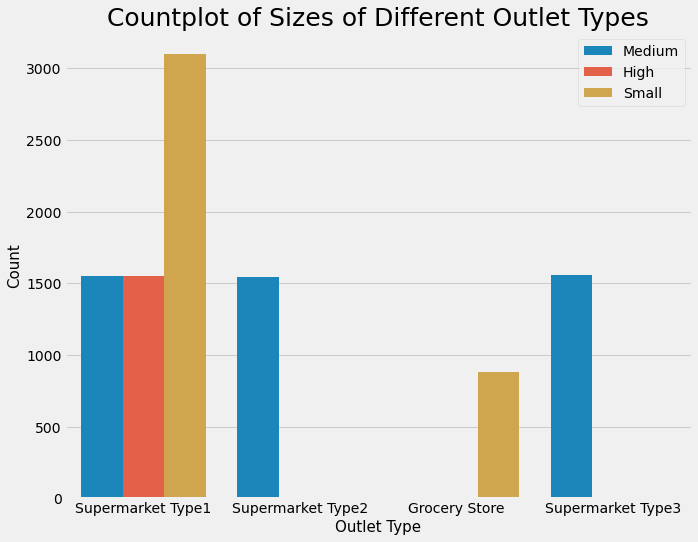

In [14]:
import seaborn as sns

# Plot bar chart of different outlet sizes 
plt.figure(figsize = (10, 8))
sns.countplot(x = 'Outlet_Type', hue = 'Outlet_Size', data = data)
plt.legend(loc='upper right')
plt.title('Countplot of Sizes of Different Outlet Types', fontsize = 25)
plt.xlabel('Outlet Type', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

From the count plot of outlet sizes for different outlet types, it seems reasonable to replace the missing values in the Outlet_Size columns with the respective modes.

1. Replace missing values of outlet type = **Supermarket Type1** to **'Small'**
2. Replace missing values of outlet type = **Supermarket Type2** to **'Medium'**
3. Replace missing values of outlet type = **Supermarket Type3** to **'Medium'**
4. Replace missing values of outlet type = **Grocery Store** to **'Small'**

In [15]:
# Replace missing values in Outlet_Size colun with respective values stated above
data.loc[data['Outlet_Size'].isnull(), 'Outlet_Size'] = data[data['Outlet_Type'] == 'Supermarket Type1'].loc[data['Outlet_Size'].isnull(), 'Outlet_Size'].apply(lambda x: 'Small')
data.loc[data['Outlet_Size'].isnull(), 'Outlet_Size'] = data[data['Outlet_Type'] == 'Supermarket Type2'].loc[data['Outlet_Size'].isnull(), 'Outlet_Size'].apply(lambda x: 'Medium')
data.loc[data['Outlet_Size'].isnull(), 'Outlet_Size'] = data[data['Outlet_Type'] == 'Supermarket Type3'].loc[data['Outlet_Size'].isnull(), 'Outlet_Size'].apply(lambda x: 'Medium')
data.loc[data['Outlet_Size'].isnull(), 'Outlet_Size'] = data[data['Outlet_Type'] == 'Grocery Store'].loc[data['Outlet_Size'].isnull(), 'Outlet_Size'].apply(lambda x: 'Small')

In [16]:
# Check for null values, there should be 0 null values now in the Outlet_Size column
print('Number of missing values in Outlet_Size column: {}'.format(data['Outlet_Size'].isnull().sum()))

Number of missing values in Outlet_Size column: 0


In [17]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
label                           0
dtype: int64

Now we can confirm that there are no more missing values in the data set. Let's proceed to feature engineering!

## 4. Feature Engineering

### Outlet Type 

Since Supermarket Type 2 and 3 both have only medium-sized outlets, we can consider combining them. However, we should investigate if their other features are similar enough to do so. For example, we can look at the mean sales grouped by outlet types.

In [18]:
data.pivot_table(values = 'Item_Outlet_Sales', index = 'Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


We can see that their sales are very different so we will not be combining both of them together.

### Item Visibility

We previously mentioned that it made no practical sense for item visibility in a store to be 0% so let's consider these inputs to be missing values and impute them with the mean item visibility.

In [19]:
# Create dataframe of unique product IDs as indexes and their respective visibility as values
item_id_visibility = data.pivot_table(values = 'Item_Visibility', index = 'Item_Identifier')
item_id_visibility

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [20]:
# Impute the 0.0 visibility values in the data using the indentifier-indexed dataframe created above
data.loc[data['Item_Visibility'] == 0.0, 'Item_Visibility'] = data.loc[data['Item_Visibility'] == 0.0, 'Item_Identifier'].apply(lambda x: item_id_visibility.loc[x].values[0])

In [21]:
data['Item_Visibility'].describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Visibility,14204.0,0.06971,0.049728,0.003575,0.031145,0.057194,0.09693,0.328391


We can see that the minimum value is no longer 0% and that we have successfully cleaned the column.

One hypothesis we did not make in section 1 was that products with higher visibility tend to sell more and generate higher sales. Therefore, we can compare visbility of products in a particular store versus mean visibility of the products across all stores by calculating its mean ratio and inputting the results as a new feature into the dataframe.

In [22]:
# Create another feature called means ratio
data['Item_Visibility_Mean_Ratio'] = data.apply(lambda x: x['Item_Visibility']/item_id_visibility.loc[x['Item_Identifier']], axis=1)
data['Item_Visibility_Mean_Ratio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_Mean_Ratio, dtype: float64

### Item Type

Earlier in data exploration, we saw that the Item_Type column had 16 categories. Also, if you investigate the Item_Identifier column closely, you can see that the IDs have prefixes of either FD, DR or NC. These prefixes most likely stand for Food, Drinks and Non-consumables respectively. Therefore, we can use this information to create a new Item_Type column with Food, Drinks and Non-consumables as our categories. 

In [23]:
new = []
for label in data['Item_Identifier']:
    if label[:2] == 'FD':
        new.append('Food')
    elif label[:2] == 'DR':
        new.append('Drinks')
    elif label[:2] == 'NC':
        new.append('Non-Consumables')

# Create new Item_Type column with new categories
data['Item_Type_New'] = new

# Check
data['Item_Type_New'].value_counts()

Food               10201
Non-Consumables     2686
Drinks              1317
Name: Item_Type_New, dtype: int64

### Years of operation of a store

In [24]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year'] # read problem statement as to why 2013 was used
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

### Standardize Fat Content column

In [25]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [26]:
# Replace LF and low fat to Low Fat and reg to Regular
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

# Check
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

Upon closer inspection, some of the non-consumables have fat content as well so it does make sense to add another category into the Item_Fat_Content column as Non-edible. 

In [27]:
data.loc[data['Item_Type_New'] == 'Non-Consumables', 'Item_Fat_Content'] = data.loc[data['Item_Type_New'] == 'Non-Consumables', 'Item_Fat_Content'].apply(lambda x: 'Non-Edible')

# Check
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

### Numerical and One-Hot Coding of Categorical variables

It is common workflow that categorical features must be encoded into numerical variables as scikit-learn models are unable to take in strings. Looking back at our hypotheses generation section, one can also assume that the unique Outlet_Identifier column is important in our prediction algorithm. Therefore, let's encode that and return it to another column.  

Let's begin by encoding all categorical variables as numeric using ‘LabelEncoder’ from sklearn’s preprocessing module:

In [28]:
categorical_cols = data.columns[data.dtypes == 'object'].to_list()

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Create new column Outlet from Outlet_Identifier
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])

# Create list of categorical columns 
categorical_cols = ['Item_Fat_Content',
                    'Outlet_Size',
                    'Outlet_Location_Type',
                    'Outlet_Type',
                    'Item_Type_New',
                    'Outlet']

# Fit transform every categorical feature
for cat in categorical_cols:
    data[cat] = le.fit_transform(data[cat])

In [30]:
data = pd.get_dummies(data, columns = categorical_cols)
data.dtypes

Item_Identifier                object
Item_Weight                   float64
Item_Visibility               float64
Item_Type                      object
Item_MRP                      float64
Outlet_Identifier              object
Outlet_Establishment_Year       int64
Item_Outlet_Sales             float64
label                          object
Item_Visibility_Mean_Ratio    float64
Outlet_Years                    int64
Item_Fat_Content_0              uint8
Item_Fat_Content_1              uint8
Item_Fat_Content_2              uint8
Outlet_Size_0                   uint8
Outlet_Size_1                   uint8
Outlet_Size_2                   uint8
Outlet_Location_Type_0          uint8
Outlet_Location_Type_1          uint8
Outlet_Location_Type_2          uint8
Outlet_Type_0                   uint8
Outlet_Type_1                   uint8
Outlet_Type_2                   uint8
Outlet_Type_3                   uint8
Item_Type_New_0                 uint8
Item_Type_New_1                 uint8
Item_Type_Ne

### Exporting Data

In [31]:
import warnings
warnings.filterwarnings('ignore')

# Drop columns which types have been converted 
data.drop(['Item_Type', 'Outlet_Establishment_Year'], axis = 1, inplace = True)

# Split data back into train and test set using the labels column added in early on in the project
train = data[data['label'] == 'train']
test = data[data['label'] == 'test']

# Drop the label column in train and test sets and Item_Outlet_Sales column in the test set
train.drop(['label'], axis = 1, inplace = True)
test.drop(['label', 'Item_Outlet_Sales'], axis = 1, inplace = True)

# Export files as modified versions
train.to_csv("train_modified.csv", index = False)
test.to_csv("test_modified.csv", index = False)

## Model Building

In [32]:
# Define target variable 
target = 'Item_Outlet_Sales'
ID_col = ['Item_Identifier', 'Outlet_Identifier']

from sklearn import metrics
from sklearn.model_selection import cross_val_score

def fit_model(alg, train_set, test_set, predictors, target, ID_col, filename):
    # Fit alogrithm on data
    alg.fit(train_set[predictors], train_set[target])
    
    # Predict on training set
    train_set_pred = alg.predict(train_set[predictors])
    
    # Perform cross-validation
    cv_score = cross_val_score(alg, train_set[predictors], train_set[target], cv = 20, scoring = 'neg_mean_squared_error')
    
    # Calculate RMSE
    cv_score = np.sqrt(np.abs(cv_score))
    
    # Print model
    print('Model Report:')
    
    print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(train_set[target].values,
                                                              train_set_pred))))
    
    print('CV Score: Mean - {}, Std - {}, Min - {}, Max - {}'.format(np.mean(cv_score),
                                                                     np.std(cv_score),
                                                                     np.min(cv_score),
                                                                     np.max(cv_score)))
    # Predict on testing set
    test_set[target] = alg.predict(test_set[predictors])
    
    # Export submission file:
    ID_col.append(target)
    submission = pd.DataFrame({x: test_set[x] for x in ID_col})
    submission.to_csv(filename, index = False)

### Linear Regression

Model Report:
RMSE: 1127.5570843051892
CV Score: Mean - 1128.828888958316, Std - 43.29832202672528, Min - 1074.3837340066484, Max - 1210.3468017078658


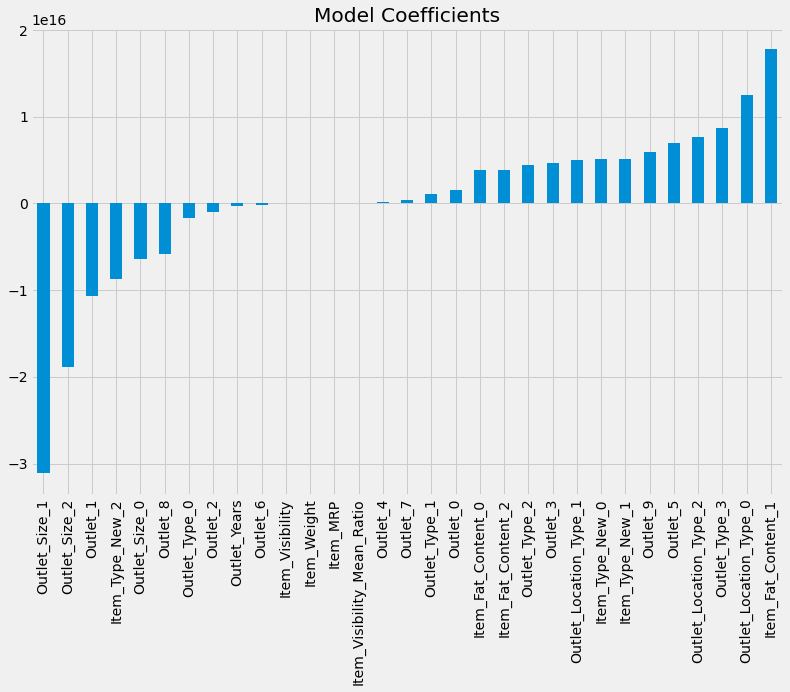

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

predictors = [col for col in train.columns if col not in [target] + ID_col]
# every feature except Item_Identifier, Outlet_Identifier, Item_Outlet_Sales

alg_lr = LinearRegression(normalize = True)

# Evaluate model by calling function
fit_model(alg_lr, train, test, predictors, target, ID_col, 'alg_lr.csv')

plt.figure(figsize = (12, 8))

coef1 = pd.Series(alg_lr.coef_, predictors).sort_values()
coef1.plot(kind = 'bar', title = 'Model Coefficients')

plt.show()

From the plot, we can see that the magnitude of the coefficients are very large. This means the level of complexity of our model is high which also signifies overfitting. Therefore, we will implement the Ridge and LASSO regression to introduce regularization and apply penalty to the coefficients in order to avoid overfitting and still achieve a high accuracy. 

### Ridge Regression

Model Report:
RMSE: 1127.3799540293417
CV Score: Mean - 1128.7832356595288, Std - 43.39542375446558, Min - 1074.5421651423414, Max - 1210.357695595109


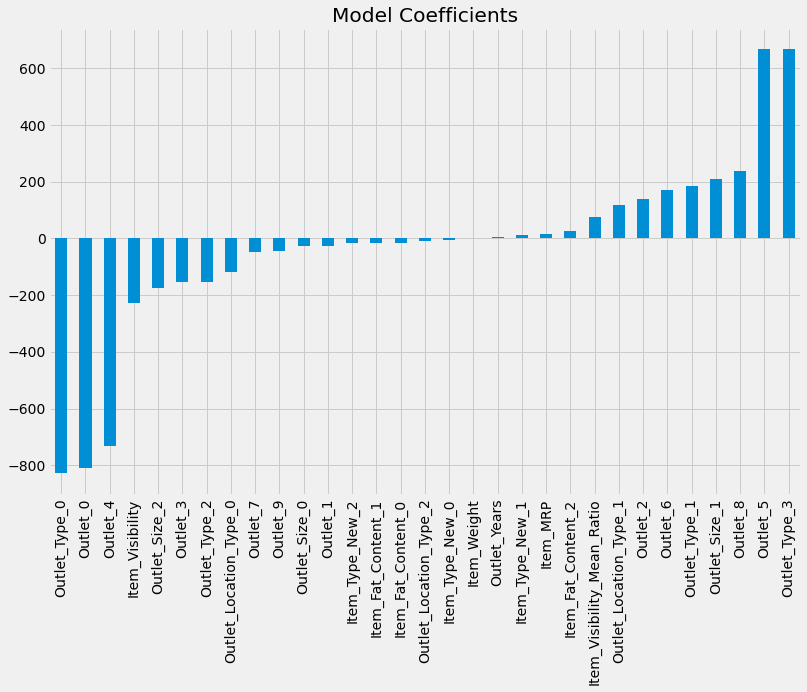

In [34]:
alg_rr = Ridge(alpha = 0.0001, normalize = True)

# Evaluate model by calling function
fit_model(alg_rr, train, test, predictors, target, ID_col, 'alg_rr.csv')

plt.figure(figsize = (12, 8))

coef2 = pd.Series(alg_rr.coef_, predictors).sort_values()
coef2.plot(kind = 'bar', title = 'Model Coefficients')

plt.show()

Take note of the scales on the y-axis. Ridge Regression is able to reduce the complexity of the model by applying a penalty on the coefficients and reducing them through regularization. However, even after regularization, it seems to have little effect on the results as they are very similar to the results from Linear Regression model.

### LASSO Regression

Model Report:
RMSE: 1127.3799488626228
CV Score: Mean - 1128.783194526545, Std - 43.39301978693186, Min - 1074.5435174300503, Max - 1210.3443107821056


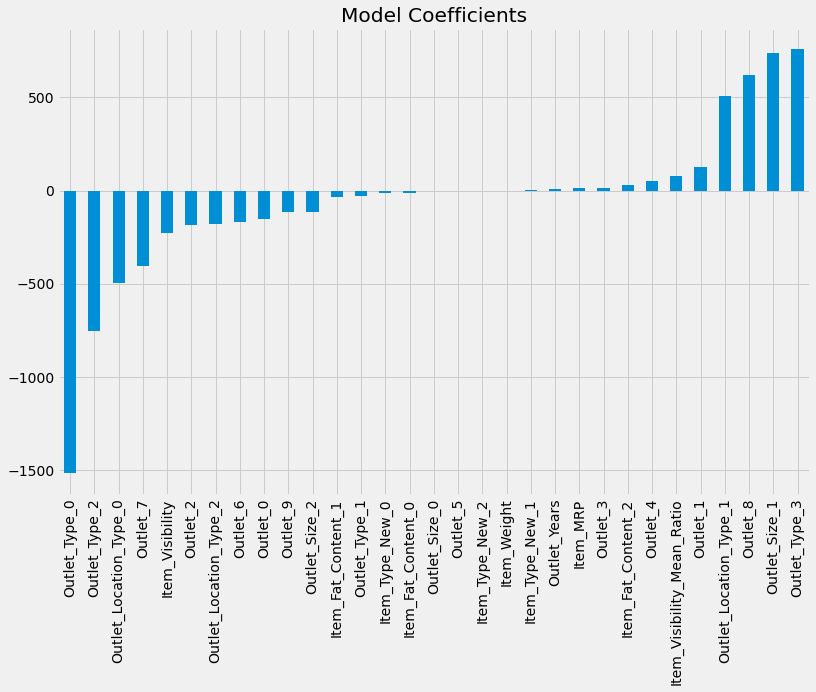

In [35]:
alg_lasso = Lasso(alpha = 0.0001, normalize = True)

# Evaluate model by calling function
fit_model(alg_lasso, train, test, predictors, target, ID_col, 'alg_lasso.csv')

plt.figure(figsize = (12, 8))

coef3 = pd.Series(alg_lasso.coef_, predictors).sort_values()
coef3.plot(kind = 'bar', title = 'Model Coefficients')

plt.show()

### Decision Tree 

Model Report:
RMSE: 1057.6934941675377
CV Score: Mean - 1091.4968931846693, Std - 45.420001961901285, Min - 1002.7950800985651, Max - 1186.4108567725732


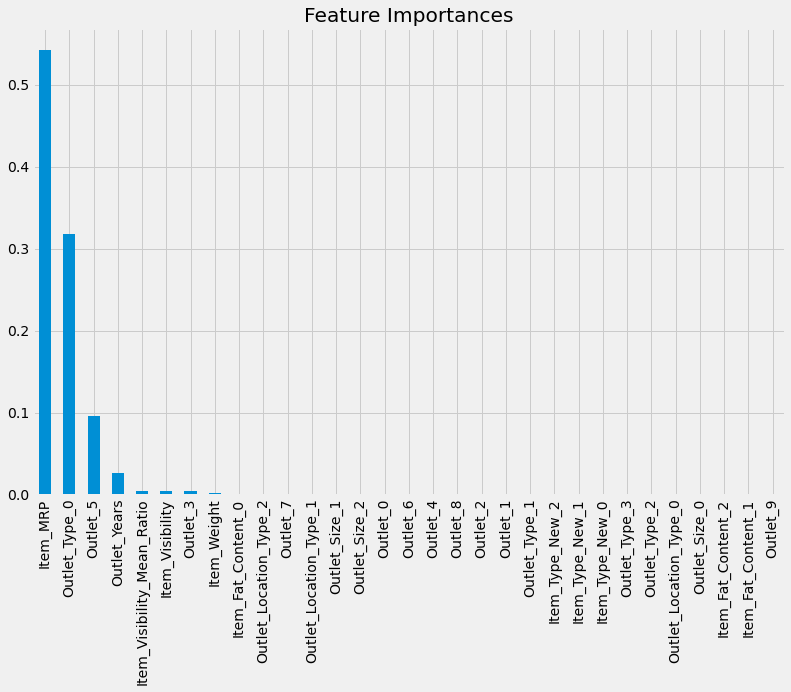

In [40]:
from sklearn.tree import DecisionTreeRegressor

alg_tree = DecisionTreeRegressor(max_depth = 15, min_samples_leaf = 100, min_samples_split = 5)

# Evaluate model by calling function
fit_model(alg_tree, train, test, predictors, target, ID_col, 'alg_tree.csv')

plt.figure(figsize = (12, 8))

coef4 = pd.Series(alg_tree.feature_importances_, predictors).sort_values(ascending = False)
coef4.plot(kind = 'bar', title = 'Feature Importances')

plt.show()

The RMSE is 1057.69 and the mean CV error is 1091.50 which signfies slight overfitting. Let's tune the Decision tree model parameters and only select the top 4 most important features as predictors.

Model Report:
RMSE: 1071.2364214016316
CV Score: Mean - 1096.1065402097997, Std - 43.30211900031146, Min - 1027.3440164414137, Max - 1171.5022305730886


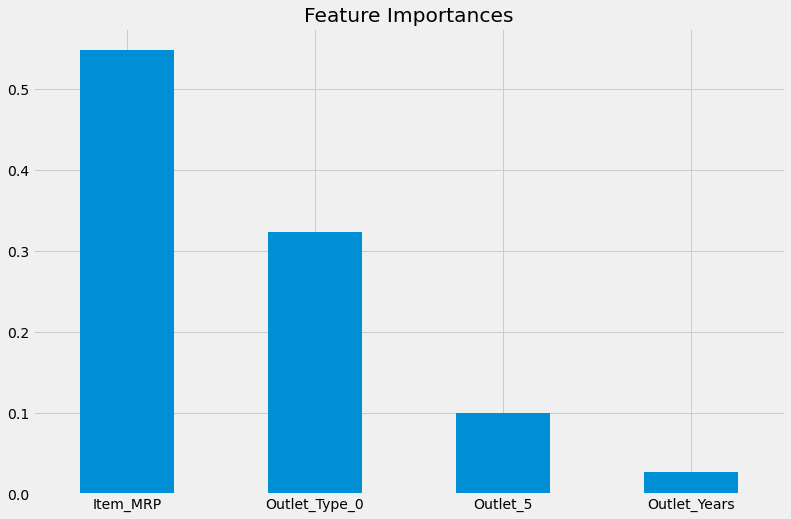

In [43]:
new_predictors = ['Item_MRP', 'Outlet_Type_0', 'Outlet_5', 'Outlet_Years']

alg_tree_new = DecisionTreeRegressor(max_depth = 8, min_samples_leaf = 150, min_samples_split = 5)

# Evaluate model by calling function
fit_model(alg_tree_new, train, test, new_predictors, target, ID_col, 'alg_tree_new.csv')

plt.figure(figsize = (12, 8))

coef5 = pd.Series(alg_tree_new.feature_importances_, new_predictors).sort_values(ascending = False)
coef5.plot(kind = 'bar', title = 'Feature Importances')
plt.xticks(rotation = 0)

plt.show()

### Random Forest

Model Report:
RMSE: 1061.0280855501057
CV Score: Mean - 1082.663366026064, Std - 43.605661779808315, Min - 1019.2687627759922, Max - 1163.2656915172597


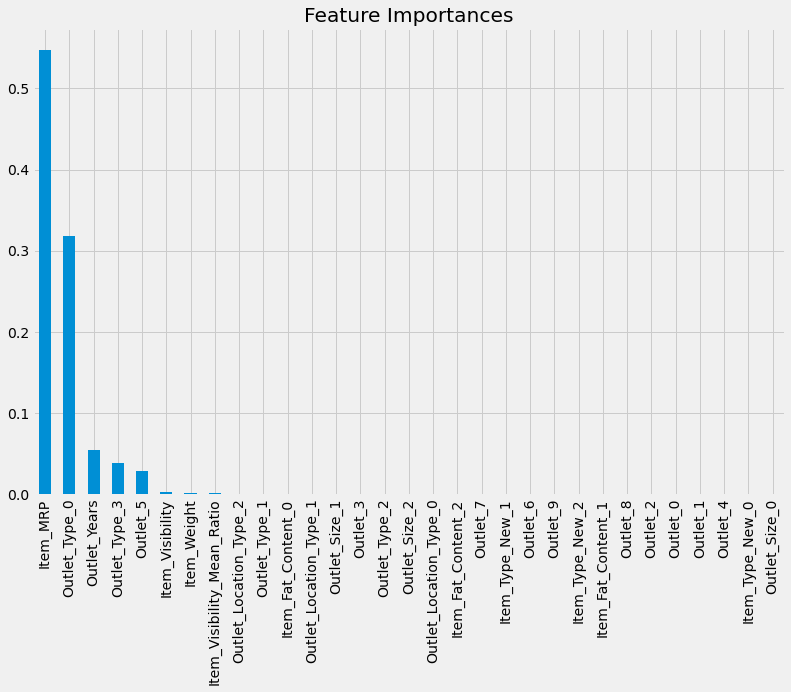

In [44]:
from sklearn.ensemble import RandomForestRegressor

alg_forest = RandomForestRegressor(n_estimators = 200, max_depth = 15, min_samples_leaf = 100, n_jobs = -1)

# Evaluate model by calling function
fit_model(alg_forest, train, test, predictors, target, ID_col, 'alg_forest.csv')

plt.figure(figsize = (12, 8))

coef6 = pd.Series(alg_forest.feature_importances_, predictors).sort_values(ascending = False)
coef6.plot(kind = 'bar', title = 'Feature Importances')

plt.show()

Model Report:
RMSE: 1060.7082523418312
CV Score: Mean - 1082.9155159646962, Std - 43.656221917236515, Min - 1019.5148647295332, Max - 1162.480389690101


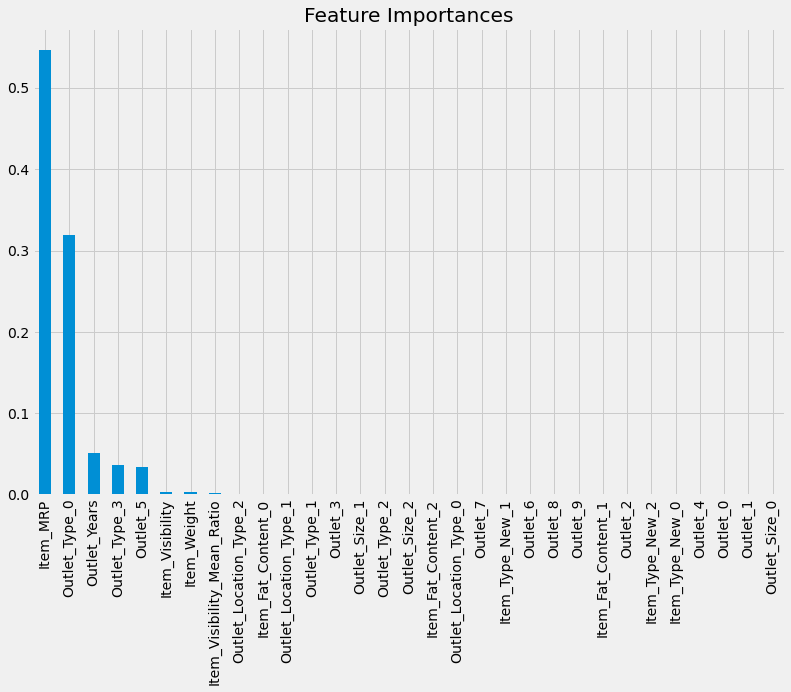

In [46]:
alg_forest_new = RandomForestRegressor(n_estimators = 400, max_depth = 15, min_samples_leaf = 100, n_jobs = -1)

# Evaluate model by calling function
fit_model(alg_forest_new, train, test, predictors, target, ID_col, 'alg_forest_new.csv')

plt.figure(figsize = (12, 8))

coef7 = pd.Series(alg_forest_new.feature_importances_, predictors).sort_values(ascending = False)
coef7.plot(kind = 'bar', title = 'Feature Importances')

plt.show()

## Conclusion

This project showcased a typical (but not a strictly-followed procedure) data analysis workflow. We started off with some **hypotheses generation** to get us thinking about the dataset, its relationships and provided us with potential inferences to explore in subsequent sections. We then moved onto **data exploration** and discovered how the data set needed cleaning and reformatting. After cleaning, we carried out **data cleaning and feature engineering** where we imputed missing values and corrected incorrectly inputted data like the visibility values. Cateogrical features were also one hot encoded into numerical features for prediction. Lastly, we fed our data to several models like Linear Regression, Decision Tree and Random Forest, evaluated their performances and tuned for slightly better results.